# SQL WORKSHOP

<img src="https://s-media-cache-ak0.pinimg.com/originals/d0/b3/18/d0b318cdecf5daaec01357ede40f6d10.jpg">

In [2]:
%matplotlib inline
import sqlite3
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# DB_FILENAME = 'porto.db'
DB_NAME = 'my_trip.db'

# QUERIES

## Q1
what is the maximum, minimum and average trip lengths (in minutes)?
can you do it with just one query? 

here is a good refresher: https://swcarpentry.github.io/sql-novice-survey/06-agg/ 

In [5]:
%%timeit -n1 -r1
# what is the maximum, minimum and average trip lengths (in minutes)?
# trip_lengths_in_minutes = (nb_points)*15/60
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
    cur.execute('''SELECT MAX((nb_points)*15/60),
                         MIN((nb_points)*15/60), 
                         AVG((nb_points)*15/60) 
                         FROM trips ''')
    res = cur.fetchall()
    con.commit()
print('The maximum {}, minimum {} and average {} trip lengths (in minutes)'.format(res[0][0],res[0][1],res[0][2]))

The maximum 119, minimum 2 and average 12.00299756660264 trip lengths (in minutes)
312 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q2
what is the percentage of trips that took longer than average?

**using only sql**

hint: use a subquery

In [6]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
    cur.execute(''' SELECT COUNT(nb_points*15/60)*100/(SELECT COUNT(nb_points*15/60) 
                    FROM trips) FROM trips
                    WHERE nb_points*15/60 > (SELECT AVG(nb_points*15/60) FROM trips ) ''')
    res = cur.fetchall()
print(" The percentage of trips that took longer than average is: {}%".format(res[0][0]))

 The percentage of trips that took longer than average is: 35%
494 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q3
Find all taxi ids with more than 6500 trips 

hint: use the HAVING clause

In [7]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
    cur.execute(''' SELECT taxi_id , 
                       COUNT(trip_id) as count_trips
                       FROM trips 
                       GROUP BY taxi_id 
                       HAVING count_trips > 6500''')

print('____________________\ntaxi ids  | trip_count\n__________________')
[print(row) for row in cur.fetchall()]


____________________
taxi ids  | trip_count
__________________
(20000089, 6842)
(20000129, 7036)
(20000307, 7202)
(20000364, 6995)
(20000403, 6855)
(20000424, 6874)
(20000483, 7560)
(20000492, 7054)
(20000529, 6882)
(20000621, 7223)
724 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q4
#### Find all taxi pairs with the same number of total trips. Note that the pair should be unique. 
#### You can't have taxis 1 and 2 and taxis 2 and 1 in the same result set since pairs are invariant to order. 
Use only SQL.

In [44]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
    cur.execute(''' SELECT distinct taxi_1.taxi_id, taxi_2.taxi_id 
                    FROM (SELECT taxi_id, COUNT(trip_id) AS count_trips FROM trips GROUP BY taxi_id) AS taxi_1
                    JOIN 
                    (SELECT taxi_id, COUNT(trip_id) as count_trips from trips GROUP BY taxi_id) as taxi_2
                    ON taxi_1.count_trips = taxi_2.count_trips
                    WHERE (taxi_1.taxi_id !=  taxi_2.taxi_id ) and (taxi_2.taxi_id !=  taxi_1.taxi_id ) and 
                    (taxi_1.taxi_id <  taxi_2.taxi_id )''')
                      

    
        
print('________________\ntaxi_1 id| taxi_2 id\n__________________')
[ print(str(row[0])+' | '+str(row[1])) for row in cur.fetchall() ]


________________
taxi_1 id| taxi_2 id
__________________
20000002 | 20000321
20000032 | 20000100
20000046 | 20000562
20000075 | 20000092
20000084 | 20000346
20000084 | 20000452
20000086 | 20000231
20000107 | 20000126
20000119 | 20000146
20000148 | 20000610
20000173 | 20000360
20000186 | 20000607
20000263 | 20000304
20000271 | 20000392
20000273 | 20000436
20000310 | 20000680
20000331 | 20000674
20000346 | 20000452
20000347 | 20000608
20000467 | 20000549
20000477 | 20000547
20000506 | 20000596
1.31 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q5
What are top 10 rarest and most common trip lengths in minutes in the database? How many of each?

In [9]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    
    cur = con.cursor()#(nb_points)*15/60
    cur.execute('''SELECT nb_points*15/60, COUNT(nb_points*15/60) as rarest 
                   FROM     trips
                   GROUP BY nb_points*15/60
                   ORDER BY rarest 
                   LIMIT    10''')
print('top 10 most rarest trips lengths in minutes\n')
print('________________\nlenth min| count\n__________________')
[ print(str(row[0])+'      | '+str(row[1])) for row in cur.fetchall() ]


top 10 most rarest trips lengths in minutes

________________
lenth min| count
__________________
118      | 36
119      | 43
117      | 50
110      | 51
115      | 53
116      | 53
109      | 54
107      | 55
111      | 55
113      | 58
664 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    
    cur = con.cursor()#(nb_points)*15/60

    cur.execute('''SELECT nb_points*15/60, COUNT(nb_points*15/60) as rarest 
                   FROM     trips
                   GROUP BY nb_points*15/60
                   ORDER BY rarest DESC
                   LIMIT    10''')

print('top 10 most common trips lengths in minutes\n')
print('________________\nlenth min| count\n__________________')
[ print(str(row[0])+'        | '+str(row[1])) for row in cur.fetchall() ]


top 10 most common trips lengths in minutes

________________
lenth min| count
__________________
8        | 131287
9        | 128104
7        | 126250
10        | 120152
6        | 118073
11        | 110198
5        | 100314
12        | 99515
13        | 88071
14        | 76315
635 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Indices Exercises

##  I1

Get the cooridnates of the trip with id `7`. Use `%%timeit` magic to measure the time per iteration 

In [11]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
    cur.execute('''SELECT lon, lat 
                FROM coords
                WHERE trip_id == 7''')
print('_______________________\nlon       | lat\n__________________')
[ print(str(row[0])+' | '+str(row[1])) for row in cur.fetchall() ]


_______________________
lon       | lat
__________________
-8.617563 | 41.146182
-8.617527 | 41.145849
-8.616978 | 41.144832
-8.615754 | 41.145426
-8.615745 | 41.145408
-8.615466 | 41.145714
-8.615142 | 41.147046
-8.615142 | 41.147118
-8.61579 | 41.147298
-8.617455 | 41.147235
-8.617716 | 41.147217
-8.618013 | 41.147505
-8.618796 | 41.148603
-8.619948 | 41.148468
-8.620758 | 41.148927
-8.621055 | 41.150565
-8.620893 | 41.152284
-8.621001 | 41.154246
-8.620821 | 41.15547
-8.620848 | 41.155452
-8.620812 | 41.155803
-8.62092 | 41.157225
-8.622819 | 41.158242
-8.624682 | 41.159475
-8.624664 | 41.159718
-8.624691 | 41.160492
-8.624709 | 41.161563
-8.624718 | 41.161563
-8.624727 | 41.161554
-8.624736 | 41.161545
-8.624736 | 41.161536
-8.624736 | 41.161536
-8.624727 | 41.161545
-8.6247 | 41.161554
11.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## I2

Add an index on the column `trip_id` in the table `coords`. Here is a reference: http://www.sqlitetutorial.net/sqlite-index/
patient. This may take some time - be patient. 


In [12]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
    cur.execute('''CREATE INDEX index_trip_id
                ON coords (trip_id)''')


OperationalError: index index_trip_id already exists

Rerun the timing perfomrance test from the previous question. What is the difference? 


In [30]:
%%timeit -n1 -r1
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()

    cur.execute('''SELECT lon, lat 
                FROM coords
                WHERE trip_id == 7''')
print('_______________________\nlon       | lat\n__________________')
[ print(str(row[0])+' | '+str(row[1])) for row in cur.fetchall() ]


_______________________
lon       | lat
__________________
-8.617563 | 41.146182
-8.617527 | 41.145849
-8.616978 | 41.144832
-8.615754 | 41.145426
-8.615745 | 41.145408
-8.615466 | 41.145714
-8.615142 | 41.147046
-8.615142 | 41.147118
-8.61579 | 41.147298
-8.617455 | 41.147235
-8.617716 | 41.147217
-8.618013 | 41.147505
-8.618796 | 41.148603
-8.619948 | 41.148468
-8.620758 | 41.148927
-8.621055 | 41.150565
-8.620893 | 41.152284
-8.621001 | 41.154246
-8.620821 | 41.15547
-8.620848 | 41.155452
-8.620812 | 41.155803
-8.62092 | 41.157225
-8.622819 | 41.158242
-8.624682 | 41.159475
-8.624664 | 41.159718
-8.624691 | 41.160492
-8.624709 | 41.161563
-8.624718 | 41.161563
-8.624727 | 41.161554
-8.624736 | 41.161545
-8.624736 | 41.161536
-8.624736 | 41.161536
-8.624727 | 41.161545
-8.6247 | 41.161554
6.92 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## I3


Add a `start_dow` column with the day of the week the trip started in.

In [72]:
cur.execute("""ALTER TABLE trips ADD COLUMN start_dow CHAR(10)""")
con.commit()
cur.execute("UPDATE trips SET start_dow = strftime('%w', start_ts, 'unixepoch')")
con.commit()

In [197]:
%%timeit -n1 -r1
# columns info
cur = con.cursor()
cur.execute('''PRAGMA table_info(trips);''')
[print(row) for row in cur.fetchall()]
con.commit()
print('coords')
cur = con.cursor()
cur.execute('''PRAGMA table_info(coords);''')
[print(row) for row in cur.fetchall()]
con.commit()

(0, 'trip_id', 'INTEGER', 0, None, 1)
(1, 'taxi_id', 'INTEGER', 0, None, 0)
(2, 'day_type', 'CHAR(1)', 0, None, 0)
(3, 'missing_data', 'BOLLEAN', 0, None, 0)
(4, 'start_ts', 'INTEGER', 0, None, 0)
(5, 'start_year', 'INTEGER', 0, None, 0)
(6, 'start_month', 'INTEGER', 0, None, 0)
(7, 'start_day', 'INTEGER', 0, None, 0)
(8, 'start_hour', 'INTEGER', 0, None, 0)
(9, 'nb_points', 'INTEGER', 0, None, 0)
(10, 'dist_km', 'FLOAT', 0, None, 0)
(11, 'is_birthday', 'BOOLEAN', 0, None, 0)
(12, 'is_before_13', 'BOOLEAN', 0, None, 0)
(13, 'start_dow', 'CHAR(10)', 0, None, 0)
coords
(0, 'trip_id', 'INTEGER', 0, None, 0)
(1, 'sample_id', 'INTEGER', 0, None, 1)
(2, 'lon', 'FLOAT', 0, None, 0)
(3, 'lat', 'FLOAT', 0, None, 0)
(4, 'dist', 'FLOAT', 0, None, 0)
6.64 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Count the number of trips per day of the week and hour. Visualize in a heat map (use seaborn's heatmap, https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [64]:
with sqlite3.connect(DB_NAME) as con:
    cur = con.cursor()
   
    cur.execute('''SELECT COUNT(trip_id) as trip_count, start_dow, start_hour 
                    FROM trips
                    GROUP BY start_dow, start_hour''')
    result = cur.fetchall() 

df = pd.DataFrame(data=result, columns=['trip_count', 'week_day', 'hour'])
df

,trip_count,week_day,hour
0,6660,0,0
1,5246,0,1
2,7281,0,2
3,13186,0,3
4,14171,0,4
...,...,...,...
163,8855,6,19
164,9283,6,20
165,9943,6,21
166,10903,6,22


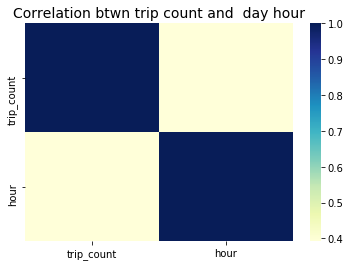

In [87]:

sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation btwn trip count and  day hour", fontsize=14)
plt.show()


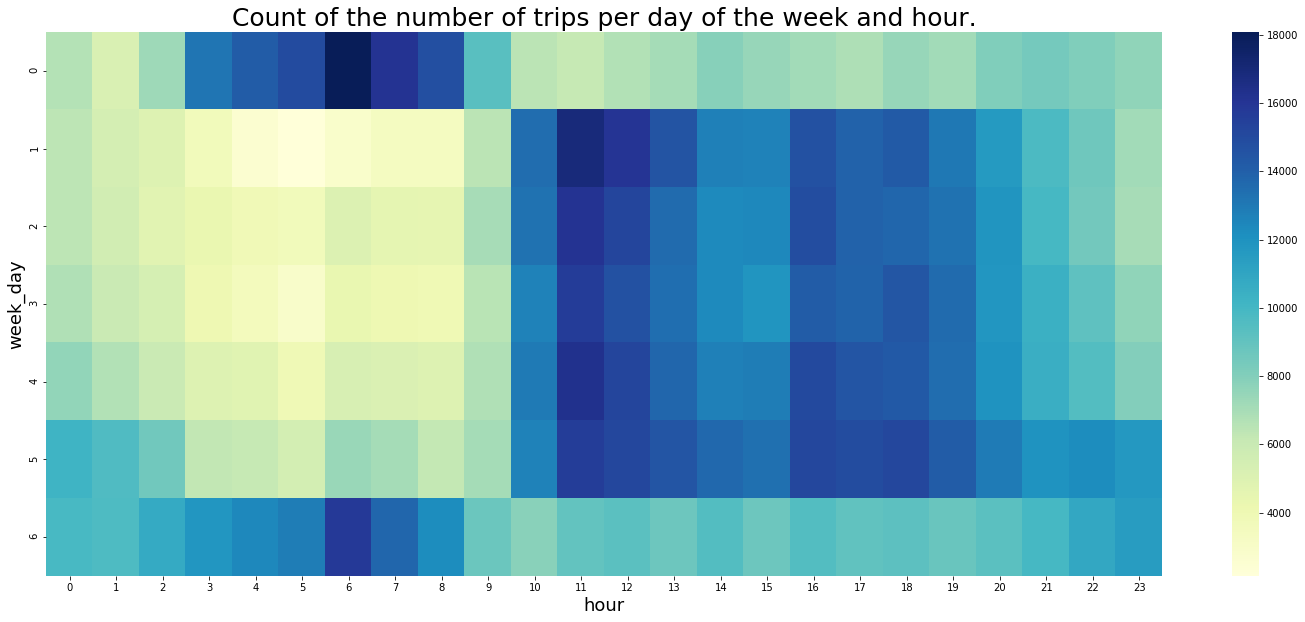

In [84]:
df_plot = df.pivot( "week_day","hour", "trip_count")
f, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(df_plot.to_numpy(dtype = float),cmap="YlGnBu")
plt.xlabel('hour',fontsize=18)
plt.ylabel('week_day',fontsize=18)
plt.title("Count of the number of trips per day of the week and hour.", fontsize=25)
plt.show()




 Find the average coordinate that trips started for each hour and day of the week

In [89]:
cur = con.cursor()

cur.execute('''SELECT AVG(lon), AVG(lat), start_dow, start_hour 
                FROM trips
                JOIN 
                (SELECT MIN(sample_id), trip_id, lat, lon FROM coords GROUP BY trip_id) as start_coords 
                ON start_coords.trip_id == trips.trip_id
                GROUP BY start_dow, start_hour''')
res = cur.fetchall()
df = pd.DataFrame(data=res, columns=['avg_lon', 'avg_lat', 'week_day', 'hour'])
df

,avg_lon,avg_lat,week_day,hour
0,-8.612694,41.153694,0,0
1,-8.615759,41.154113,0,1
2,-8.617802,41.155621,0,2
3,-8.619527,41.155738,0,3
4,-8.619102,41.154029,0,4
...,...,...,...,...
163,-8.617752,41.155679,6,19
164,-8.617567,41.155411,6,20
165,-8.617447,41.155375,6,21
166,-8.618075,41.156735,6,22


Visualize the mean start coordinates in a scatter plot - change the color based on the hour of the day

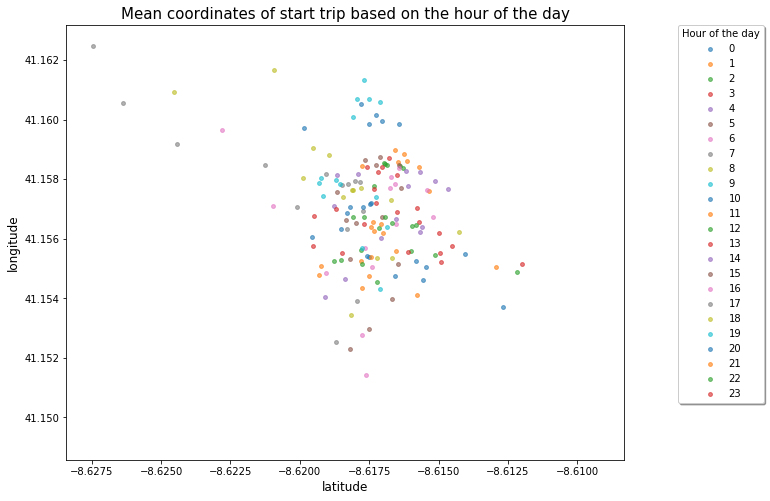

In [96]:
df_hour = df[['avg_lat', 'avg_lon', 'hour']]

f_hour, ax = plt.subplots(figsize=(10, 8))
groups = df_hour.groupby('hour')

for name, group in groups:
    group = group.reset_index()
    ax.scatter( group.avg_lon,group.avg_lat, label = name, alpha=0.6, s = 15)

plt.legend(bbox_to_anchor=(1.25,1), borderaxespad=0,fancybox=True, 
           shadow=True, ncol=1, title = "Hour of the day")
plt.xlabel('latitude',fontsize=12)
plt.ylabel('longitude',fontsize=12)
plt.title("Mean coordinates of start trip based on the hour of the day",fontsize=15)
plt.show()

Visualize the mean start coordinates in a scatter plot - change the color based on the day of the week

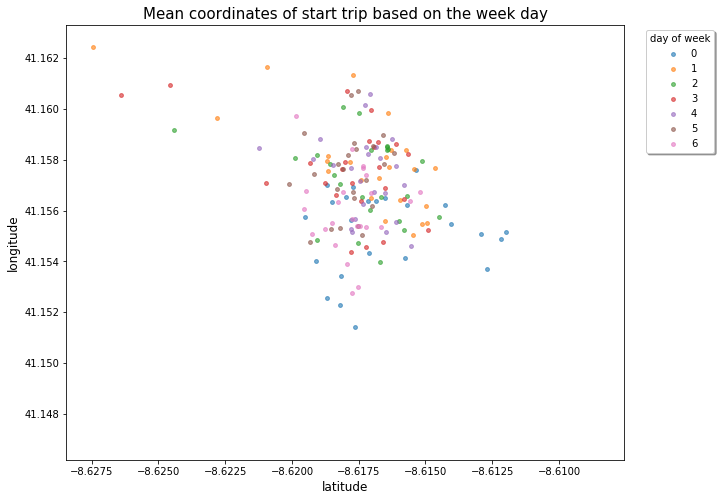

In [99]:
df_hour = df[['avg_lat', 'avg_lon', 'week_day']]

f_hour, ax= plt.subplots(figsize=(10, 8))
groups = df_hour.groupby('week_day')

for name, group in groups:
    group = group.reset_index()
    ax.scatter( group.avg_lon,group.avg_lat, label = name, alpha=0.6, s = 15)

plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
           fancybox=True, shadow=True, ncol=1, title = "day of week")
plt.xlabel('latitude',fontsize=12)
plt.ylabel('longitude',fontsize=12)
plt.title("Mean coordinates of start trip based on the week day",fontsize=15)
plt.show()

 Find the average coordinate that trips ended for each hour and day of the week

In [51]:
cur = con.cursor()

cur.execute('''SELECT AVG(lon), AVG(lat),start_dow, start_hour 
                FROM trips
                JOIN (SELECT MAX(sample_id), trip_id, lat, lon FROM coords GROUP BY trip_id) as end_coords 
                ON end_coords.trip_id == trips.trip_id
                GROUP BY start_dow, start_hour''')
res = cur.fetchall()
df = pd.DataFrame(data=res, columns=['avg_lon', 'avg_lat', 'week_day', 'hour'])
df

,avg_lon,avg_lat,week_day,hour
0,-8.617466,41.159183,0,0
1,-8.617847,41.159598,0,1
2,-8.618615,41.158002,0,2
3,-8.620123,41.157146,0,3
4,-8.620476,41.158218,0,4
...,...,...,...,...
163,-8.618621,41.158783,6,19
164,-8.619683,41.159254,6,20
165,-8.620477,41.158747,6,21
166,-8.620219,41.157916,6,22


Visualize the mean end coordinates in a scatter plot - change the color based on the hour of the day

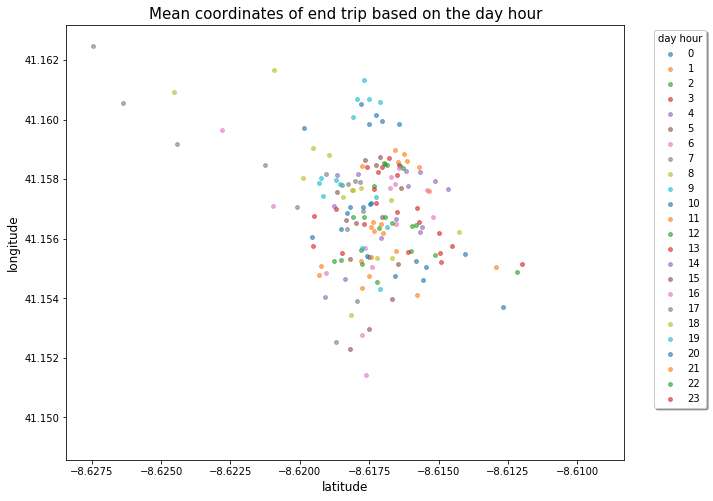

In [101]:
df_hour = df[['avg_lon', 'avg_lat', 'week_day', 'hour']]

f_hour, ax= plt.subplots(figsize=(10, 8))
groups = df_hour.groupby('hour')

for name, group in groups:
    group = group.reset_index()
    ax.scatter( group.avg_lon,group.avg_lat, label = name, alpha=0.6, s = 15)

plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
           fancybox=True, shadow=True, ncol=1, title = "day hour")
plt.xlabel('latitude',fontsize=12)
plt.ylabel('longitude',fontsize=12)
plt.title("Mean coordinates of end trip based on the day hour",fontsize=15)
plt.show()

Visualize the mean end coordinates in a scatter plot - change the color based on the day of the week

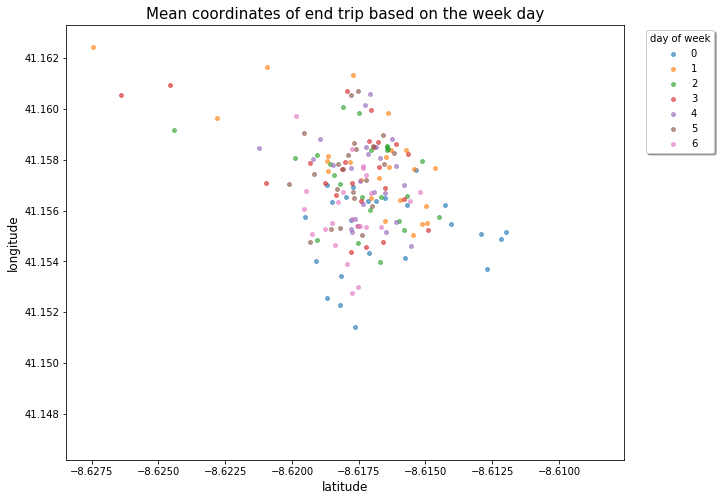

In [102]:
df_hour = df[['avg_lon', 'avg_lat', 'week_day', 'hour']]

f_hour, ax= plt.subplots(figsize=(10, 8))
groups = df_hour.groupby('week_day')

for name, group in groups:
    group = group.reset_index()
    ax.scatter( group.avg_lon,group.avg_lat, label = name, alpha=0.6, s = 15)

plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
           fancybox=True, shadow=True, ncol=1, title = "day of week")
plt.xlabel('latitude',fontsize=12)
plt.ylabel('longitude',fontsize=12)
plt.title("Mean coordinates of end trip based on the week day",fontsize=15)
plt.show()

## BONUS

Visualize the mean movement for each hour of the day (lines from start to finish)

In [60]:
cur = con.cursor()

cur.execute('''SELECT AVG(lon), AVG(lat),start_dow, start_hour 
                FROM trips
                JOIN (SELECT AVG(sample_id), trip_id, lat, lon FROM coords GROUP BY trip_id) as avg_coords 
                ON avg_coords.trip_id == trips.trip_id
                GROUP BY start_dow, start_hour''')
res = cur.fetchall()
df = pd.DataFrame(data=res, columns=['avg_lon', 'avg_lat', 'week_day', 'hour'])
df

,avg_lon,avg_lat,week_day,hour
0,-8.612694,41.153694,0,0
1,-8.615759,41.154113,0,1
2,-8.617802,41.155621,0,2
3,-8.619527,41.155738,0,3
4,-8.619102,41.154029,0,4
...,...,...,...,...
163,-8.617752,41.155679,6,19
164,-8.617567,41.155411,6,20
165,-8.617447,41.155375,6,21
166,-8.618075,41.156735,6,22


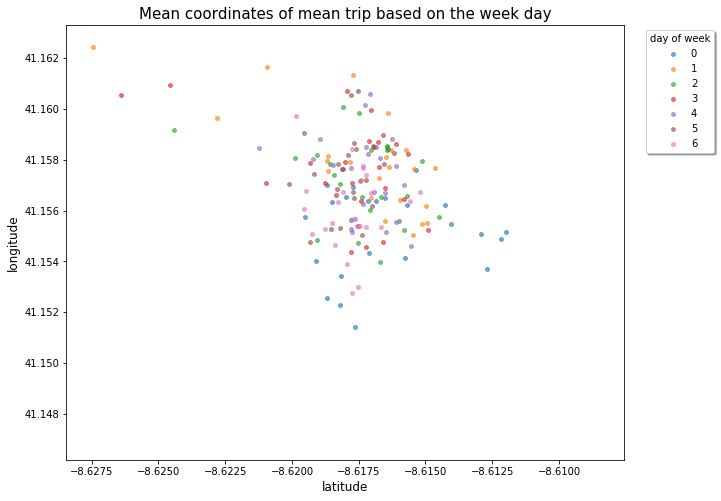

In [103]:
df_hour = df[['avg_lon', 'avg_lat', 'week_day', 'hour']]

f_hour, ax= plt.subplots(figsize=(10, 8))
groups = df_hour.groupby('week_day')

for name, group in groups:
    group = group.reset_index()
    ax.scatter( group.avg_lon,group.avg_lat, label = name, alpha=0.6, s = 15)

plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
           fancybox=True, shadow=True, ncol=1, title = "day of week")
plt.xlabel('latitude',fontsize=12)
plt.ylabel('longitude',fontsize=12)
plt.title("Mean coordinates of mean trip based on the week day", fontsize=15)
plt.show()